# **1. Introduction**
---
***INSAID assignt capstone project for HR department in a software company with below below requirements***

- Company want to try a new initiative to retain employees.

- The idea is to use data to predict whether an employee is likely to leave.

- Once these employees are identified, HR can be more proactive in reaching out to them before it's too late.

- They only want to deal with the data that is related to permanent employees.

# **2. Problem Statement**
---
***To predict whether the employee like to leave or not by using given data sets with best Machine learning model.***

---
<a name = Section3></a>
# **3. Installing & Importing Libraries & DB Connection**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mysql-connector-python

In [ ]:
#import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [ ]:
cnx = mysql.connector.connect(user='student', password='student',
                              host='cpanel.insaid.co',
                              database='Capstone2')

# **4. Data Acquisition & Wrangling**
---
The Company provided 3 datasets that contain information about past employees and their status (still employed or already left).






#### **a) department_data**
---

This dataset contains information about each department. The schema of the dataset is as follows:

**dept_id** – Unique Department Code

**dept_name** – Name of the Department

**dept_head** – Name of the Head of the Department


In [ ]:
dept_query = ("SELECT dept_id,dept_name,dept_head FROM department_data ")
df_dept = pd.read_sql(dept_query,cnx)
df_dept.to_csv('department_data.csv',index=False)

#### **b) employee_details_data**
---

This dataset consists of Employee ID, their Age, Gender and Marital Status. The schema of this dataset is as follows:

**employee_id** – Unique ID Number for each employee

**age** – Age of the employee

**gender** – Gender of the employee

**marital_status** – Marital Status of the employee



In [ ]:
emp_details_query = ("SELECT employee_id,age,gender,marital_status  FROM employee_details_data ")
df_emp_details = pd.read_sql(emp_details_query,cnx)
df_emp_details.to_csv('employee_details_data.csv',index=False)

#### **c) employee_data**

---

This dataset consists of each employee’s Administrative Information, Workload Information, Mutual Evaluation Information and Status.

#####***Target variable***
###########


**status** – Current employment status (Employed / Left)

***Administrative information***
###################

**department** – Department to which the employees belong(ed) to

**salary** – Salary level with respect to rest of their department

**tenure** – Number of years at the company

**recently_promoted** – Was the employee promoted in the last 3 years?

**employee_id** – Unique ID Number for each employee


***Workload information***
################

**n_projects** – Number of projects employee has worked on

**avg_monthly_hrs** – Average number of hours worked per month
Mutual evaluation information

**satisfaction** – Score for employee’s satisfaction with the company (higher is better)

**last_evaluation** – Score for most recent evaluation of employee (higher is better)

**filed_complaint** – Has the employee filed a formal complaint in the last 3 years?

---------------------------


In [ ]:
employee_query = ("SELECT employee_id,department,salary,tenure,recently_promoted,status,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint  FROM employee_data ")
df_employee = pd.read_sql(employee_query,cnx)
df_employee.to_csv('employee_data.csv',index=False)


**Prepare final data set by using foreign keys of 3 tables and Write into INSAID_HR_Employee.csv file for further analysis and develop best machine learning model**

In [ ]:
employee_profile_query = ("SELECT emp.employee_id,emp.department,emp.salary,emp.tenure,emp.recently_promoted,emp.status,emp.n_projects,emp.avg_monthly_hrs,emp.satisfaction,"
               "emp.last_evaluation,emp.filed_complaint,emp_det.age,emp_det.gender,emp_det.marital_status,dept.dept_name,dept.dept_head "
               " FROM employee_data AS emp RIGHT OUTER JOIN employee_details_data AS emp_det ON emp.employee_id=emp_det.employee_id "
               " RIGHT OUTER JOIN department_data AS dept ON emp.department=dept.dept_id ")

df_employee_profile = pd.read_sql(employee_profile_query,cnx)
df_employee_profile.to_csv('INSAID_HR_Employee.csv',index=False)

In [ ]:
df = pd.read_csv("INSAID_HR_Employee.csv")

### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [ ]:
df.shape
df.describe()

,employee_id,tenure,recently_promoted,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,filed_complaint,age
count,13232.000000,13082.000000,277.0,13232.000000,13232.000000,13082.000000,11833.000000,1920.0,13232.000000
mean,112114.316883,3.509402,1.0,3.782799,200.013830,0.622142,0.718513,1.0,32.932588
std,8498.801360,1.479399,0.0,1.251219,50.907572,0.250538,0.172977,0.0,9.976125
min,100101.000000,2.000000,1.0,1.000000,49.000000,0.040058,0.317279,1.0,22.000000
25%,105774.750000,3.000000,1.0,3.000000,155.000000,0.451173,0.564420,1.0,24.000000
50%,111291.500000,3.000000,1.0,4.000000,199.000000,0.654416,0.723931,1.0,29.000000
75%,116641.500000,4.000000,1.0,5.000000,245.000000,0.825671,0.871626,1.0,41.000000
max,148988.000000,10.000000,1.0,7.000000,310.000000,1.000000,1.000000,1.0,57.000000


##### **Observations:**
---
- ##### Given data set has **13232 rows and 16 columns**

- Minumum age of the employee : 22 years old

- Maximum age of the employee : 57 Years old

- Majority of the age is falling between 32-41years

- Male Employee are higher in count than female employee. Male - 65% of volume

- There are more number of young employees between the age 22-25years group.

- Nearly 9% employee size are above 50years of age

- 51% of the employee are unmarried as per the Employee_details data set

- There are more number of young employees between the age 22-25years group.

- Nearly 9% employee size are above 50years of age

- Most tenured staff are with 10years old in the company

- majority of employees are with 3 years old in the company

- Approx 60% of volume covered between 2-3years tenured employee

- 49.05% employees has low salary

- 42.75% employees has medium salary

- 8.19% employees has high salary

---

<a name = Section42></a>
### **4.2 Data Information**

- In this section we will see the **information about the types of features**.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13232 non-null  int64  
 1   department         13232 non-null  object 
 2   salary             13232 non-null  object 
 3   tenure             13082 non-null  float64
 4   recently_promoted  277 non-null    float64
 5   status             13232 non-null  object 
 6   n_projects         13232 non-null  int64  
 7   avg_monthly_hrs    13232 non-null  float64
 8   satisfaction       13082 non-null  float64
 9   last_evaluation    11833 non-null  float64
 10  filed_complaint    1920 non-null   float64
 11  age                13232 non-null  int64  
 12  gender             13232 non-null  object 
 13  marital_status     13232 non-null  object 
 14  dept_name          13232 non-null  object 
 15  dept_head          13232 non-null  object 
dtypes: float64(6), int64(3

- ##### Column **department** does not contribute for prediction, so decided to take backup of original dataset and drop this column

In [ ]:
df1 = df.copy()

In [ ]:
df.drop(["department"], axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   employee_id        13232 non-null  int64  
 1   salary             13232 non-null  object 
 2   tenure             13082 non-null  float64
 3   recently_promoted  277 non-null    float64
 4   status             13232 non-null  object 
 5   n_projects         13232 non-null  int64  
 6   avg_monthly_hrs    13232 non-null  float64
 7   satisfaction       13082 non-null  float64
 8   last_evaluation    11833 non-null  float64
 9   filed_complaint    1920 non-null   float64
 10  age                13232 non-null  int64  
 11  gender             13232 non-null  object 
 12  marital_status     13232 non-null  object 
 13  dept_name          13232 non-null  object 
 14  dept_head          13232 non-null  object 
dtypes: float64(6), int64(3), object(6)
memory usage: 1.5+ MB


---
# **5. Data Pre-Profiling**
---

- For quick analysis pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column, statistics are presented in an interactive HTML report.

In [ ]:
#profile = ProfileReport(df=df)
#profile.to_file(output_file='Pre Profiling Report.html')
#print('Accomplished!')

---
# **6. Examine the Data**
---

In [ ]:
df.isnull().sum()*100/len(df)

employee_id           0.000000
salary                0.000000
tenure                1.133615
recently_promoted    97.906590
status                0.000000
n_projects            0.000000
avg_monthly_hrs       0.000000
satisfaction          1.133615
last_evaluation      10.572854
filed_complaint      85.489722
age                   0.000000
gender                0.000000
marital_status        0.000000
dept_name             0.000000
dept_head             0.000000
dtype: float64


---
# **7. Description of what challenges are present in the Data**
---

##### **Observations:**
---
- Out of 5 NULL columns 2 columns **recently_promoted-97.90% & filed_complaint-85.48%** has high percentage(more than 50%) of NULL values,so decided to drop those columns.
- Column **tenure has 1.13%** of NULL values and **mean & median** value close to each other, So decide to impute **mean** value for NULL records after below various analysis done.

- Column **satisfaction has 1.13%** of NULL values and negative skewness, So decided to impute **median** value for NULL records after below various analysis done.

- Column **last_evaluation has 10.57%** of NULL values **mean & median** value close to each other, So decide to impute **mean** value for NULL records after below various analysis done.


### Droping the columns **recently_promoted & filed_complaint** which has more than 60% of the null values 

In [ ]:
df.drop(["recently_promoted","filed_complaint"], axis=1, inplace=True)

In [ ]:
df

,employee_id,salary,tenure,status,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,gender,marital_status,dept_name,dept_head
0,115538,medium,5.0,Left,6,175.0,0.180900,0.518677,56,Male,Married,IT,Henry Adey
1,104082,medium,5.0,Employed,3,112.0,0.629509,0.640356,23,Male,Unmarried,IT,Henry Adey
2,109816,low,3.0,Employed,5,185.0,0.644417,NaN,51,Male,Married,IT,Henry Adey
3,101734,low,3.0,Employed,4,184.0,0.859918,0.993731,26,Male,Unmarried,IT,Henry Adey
4,110531,low,3.0,Employed,4,263.0,0.969817,0.546997,31,Female,Married,IT,Henry Adey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,114267,medium,3.0,Employed,5,165.0,0.634587,0.419153,38,Female,Married,Procurement,Louie Viles
13228,107919,medium,2.0,Employed,3,195.0,0.578897,0.719636,24,Male,Unmarried,Procurement,Louie Viles
13229,115170,medium,2.0,Employed,5,271.0,0.884927,0.936487,48,Male,Married,Procurement,Louie Viles
13230,109959,low,4.0,Employed,5,197.0,0.292240,0.738941,34,Male,Married,Procurement,Louie Viles


### Imputing the **tenure, satisfaction & last_evaluation**

### Tenure column

In [ ]:
df.tenure.mode()

0    3.0
dtype: float64

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

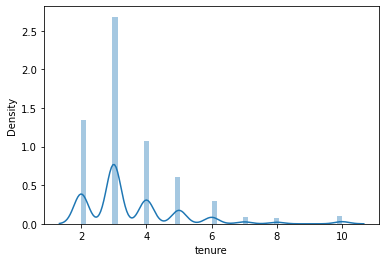

In [ ]:
sns.distplot(df.tenure)

Column **tenure** has **mean & median** value close to each other, So decide to impute **mean** value for NULL records.

In [ ]:
df.tenure.fillna(df.tenure.mean(),inplace=True)

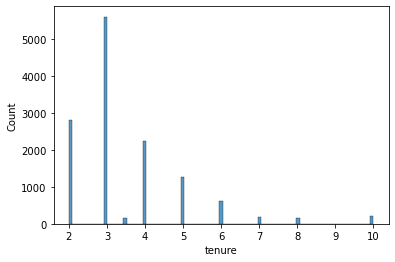

In [ ]:

sns.histplot(df.tenure)
plt.show()

In [ ]:
df.isnull().sum()*100/len(df)

employee_id         0.000000
salary              0.000000
tenure              0.000000
status              0.000000
n_projects          0.000000
avg_monthly_hrs     0.000000
satisfaction        1.133615
last_evaluation    10.572854
age                 0.000000
gender              0.000000
marital_status      0.000000
dept_name           0.000000
dept_head           0.000000
dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,13232.0,112114.316883,8498.801360,100101.000000,105774.750000,111291.500000,116641.500000,148988.0
tenure,13232.0,3.509402,1.470989,2.000000,3.000000,3.000000,4.000000,10.0
n_projects,13232.0,3.782799,1.251219,1.000000,3.000000,4.000000,5.000000,7.0
avg_monthly_hrs,13232.0,200.013830,50.907572,49.000000,155.000000,199.000000,245.000000,310.0
satisfaction,13082.0,0.622142,0.250538,0.040058,0.451173,0.654416,0.825671,1.0
last_evaluation,11833.0,0.718513,0.172977,0.317279,0.564420,0.723931,0.871626,1.0
age,13232.0,32.932588,9.976125,22.000000,24.000000,29.000000,41.000000,57.0


### Satisfaction column

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction', ylabel='Density'>

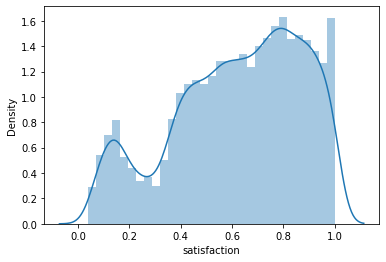

In [ ]:
sns.distplot(df.satisfaction)

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='satisfaction'>

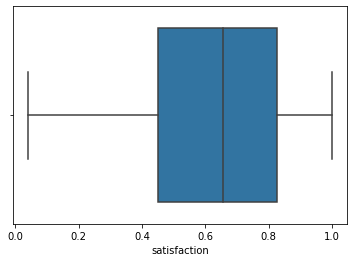

In [ ]:
sns.boxplot(df.satisfaction)

In [ ]:
df.satisfaction.mode()

0    1.0
dtype: float64

### Column **satisfaction** has negative skewness so decided to impute **median** value 

In [ ]:
df.satisfaction.fillna(df.satisfaction.median(),inplace=True)

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


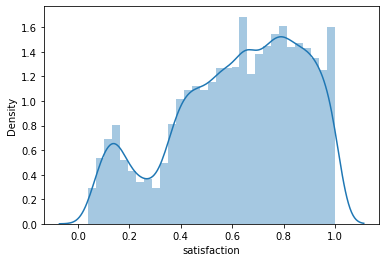

In [ ]:
sns.distplot(df.satisfaction)
plt.show()

In [ ]:
df.isnull().sum()*100/len(df)

employee_id         0.000000
salary              0.000000
tenure              0.000000
status              0.000000
n_projects          0.000000
avg_monthly_hrs     0.000000
satisfaction        0.000000
last_evaluation    10.572854
age                 0.000000
gender              0.000000
marital_status      0.000000
dept_name           0.000000
dept_head           0.000000
dtype: float64

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='satisfaction', ylabel='Density'>

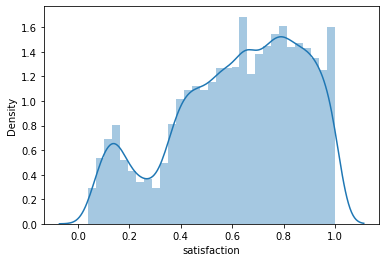

In [ ]:
sns.distplot(df.satisfaction)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,13232.0,112114.316883,8498.801360,100101.000000,105774.750000,111291.500000,116641.500000,148988.0
tenure,13232.0,3.509402,1.470989,2.000000,3.000000,3.000000,4.000000,10.0
n_projects,13232.0,3.782799,1.251219,1.000000,3.000000,4.000000,5.000000,7.0
avg_monthly_hrs,13232.0,200.013830,50.907572,49.000000,155.000000,199.000000,245.000000,310.0
satisfaction,13232.0,0.622507,0.249137,0.040058,0.453887,0.654416,0.823931,1.0
last_evaluation,11833.0,0.718513,0.172977,0.317279,0.564420,0.723931,0.871626,1.0
age,13232.0,32.932588,9.976125,22.000000,24.000000,29.000000,41.000000,57.0


### last_evaluation column

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

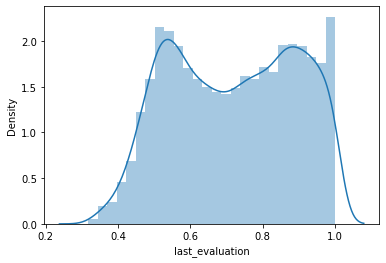

In [ ]:
sns.distplot(df.last_evaluation)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,13232.0,112114.316883,8498.801360,100101.000000,105774.750000,111291.500000,116641.500000,148988.0
tenure,13232.0,3.509402,1.470989,2.000000,3.000000,3.000000,4.000000,10.0
n_projects,13232.0,3.782799,1.251219,1.000000,3.000000,4.000000,5.000000,7.0
avg_monthly_hrs,13232.0,200.013830,50.907572,49.000000,155.000000,199.000000,245.000000,310.0
satisfaction,13232.0,0.622507,0.249137,0.040058,0.453887,0.654416,0.823931,1.0
last_evaluation,11833.0,0.718513,0.172977,0.317279,0.564420,0.723931,0.871626,1.0
age,13232.0,32.932588,9.976125,22.000000,24.000000,29.000000,41.000000,57.0


In [ ]:
df.last_evaluation.mode()

0    1.0
dtype: float64

In [ ]:
df.last_evaluation.value_counts()

1.000000    337
0.896246      3
0.940863      3
0.699756      2
0.709277      2
           ... 
0.554023      1
0.955329      1
0.518390      1
0.551789      1
0.373887      1
Name: last_evaluation, Length: 11394, dtype: int64

Column **last_evaluation** decided to impute **mean** value 

In [ ]:
df.last_evaluation.fillna(df.last_evaluation.mean(),inplace=True)

### Data cleaning process is completed 

In [ ]:
df.isnull().sum()*100/len(df)

employee_id        0.0
salary             0.0
tenure             0.0
status             0.0
n_projects         0.0
avg_monthly_hrs    0.0
satisfaction       0.0
last_evaluation    0.0
age                0.0
gender             0.0
marital_status     0.0
dept_name          0.0
dept_head          0.0
dtype: float64

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.


C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


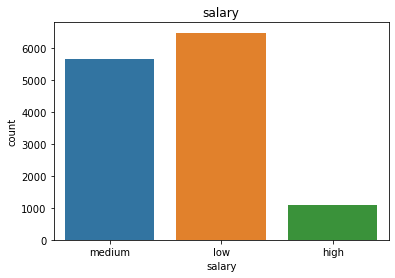

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


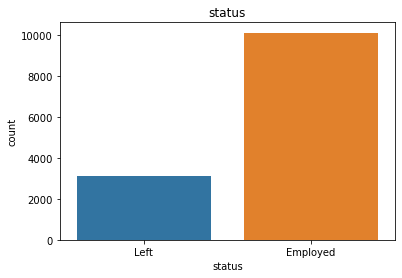

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


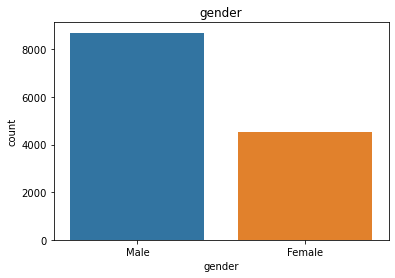

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


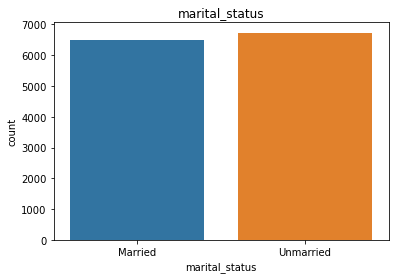

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


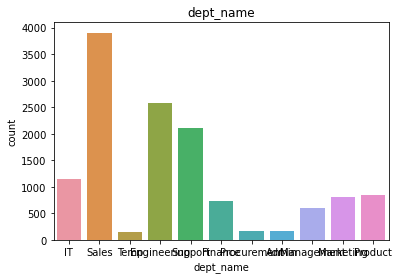

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


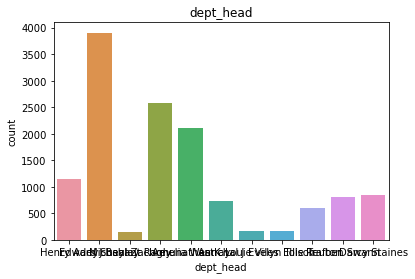

In [ ]:
for i in df.columns:
  if df[i].dtypes == "object":
    sns.countplot(df[i])
    plt.title(i)
    plt.show()

In [ ]:
df.salary.value_counts()*100/len(df)

low       49.055320
medium    42.752418
high       8.192261
Name: salary, dtype: float64

***49.05% employees has low salary***

***42.75% employees has medium salary***

***8.19% employees has high salary***

In [ ]:
df.status.value_counts()*100/len(df)

Employed    76.420798
Left        23.579202
Name: status, dtype: float64

***76.42% employees are employed at present***

***23.57% employees are already left***

In [ ]:
df.marital_status.value_counts()*100/len(df)

Unmarried    50.838875
Married      49.161125
Name: marital_status, dtype: float64

***50.83% employees are unmarried***

***49.16% employees are married***

In [ ]:
df.gender.value_counts()*100/len(df)

Male      65.787485
Female    34.212515
Name: gender, dtype: float64

***65.78% employees are male***

***34.21% employees are male***

In [ ]:
df.dept_name.value_counts()*100/len(df)

Sales          29.504232
Engineering    19.445284
Support        15.961306
IT              8.743954
Product         6.461608
Marketing       6.159311
Finance         5.479141
Management      4.481560
Admin           1.322551
Procurement     1.307437
Temp            1.133615
Name: dept_name, dtype: float64

*** Sales Department has high volume of employees (29.50%) ***

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

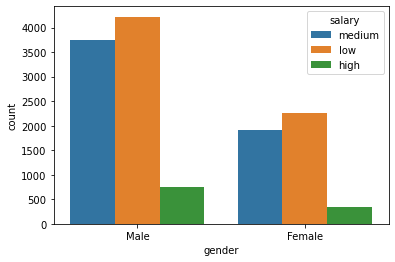

In [ ]:
sns.countplot(df.gender,hue = df.salary)

C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_status', ylabel='count'>

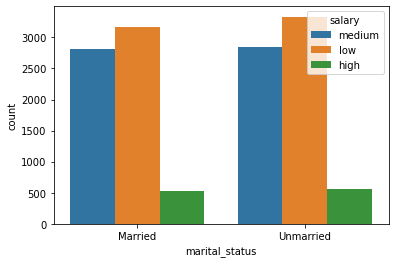

In [ ]:
sns.countplot(df.marital_status,hue = df.salary)

In [ ]:
df.groupby("marital_status").mean()

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age
marital_status,,,,,,,
Married,112220.509454,3.644813,4.722367,212.233513,0.609984,0.746787,41.344504
Unmarried,112011.628809,3.378460,2.874238,188.197413,0.634618,0.691172,24.798276


In [ ]:
df.groupby("marital_status").median()

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age
marital_status,,,,,,,
Married,111176,3.0,5,217.0,0.674314,0.747428,41
Unmarried,111392,3.0,3,180.0,0.643800,0.717213,24


In [ ]:
mg = df.groupby("marital_status").agg(lambda x: x.mode())
mg

,salary,tenure,status,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,gender,dept_name,dept_head
marital_status,,,,,,,,,,,
Married,low,3.0,Employed,4,260.0,1.0,0.718513,42,Male,Sales,Edward J Bayley
Unmarried,low,3.0,Employed,3,156.0,1.0,0.718513,24,Male,Sales,Edward J Bayley


In [ ]:
df.groupby("status").mean()

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age
status,,,,,,,
Employed,111074.767801,3.397174,3.759197,197.724980,0.675757,0.714473,33.213904
Left,115483.522115,3.873137,3.859295,207.432051,0.449926,0.731607,32.020833


In [ ]:
st1 = df.groupby("status").agg(lambda x: x.mode())
st1

,salary,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,gender,marital_status,dept_name,dept_head
status,,,,,,,,,,,
Employed,low,3.0,3,173.0,1.000000,0.718513,24,Male,Married,Sales,Edward J Bayley
Left,low,3.0,2,135.0,0.654416,0.718513,23,Male,Unmarried,Sales,Edward J Bayley


C:\Users\jaswa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital_status', ylabel='count'>

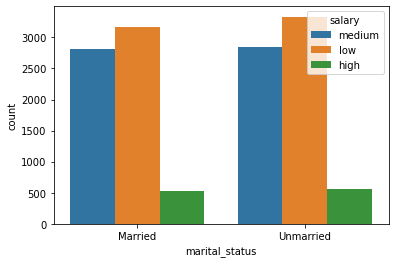

In [ ]:
sns.countplot(df.marital_status,hue=df.salary)

In [ ]:
df.describe()

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age
count,13232.000000,13232.000000,13232.000000,13232.000000,13232.000000,13232.000000,13232.000000
mean,112114.316883,3.509402,3.782799,200.013830,0.622507,0.718513,32.932588
std,8498.801360,1.470989,1.251219,50.907572,0.249137,0.163577,9.976125
min,100101.000000,2.000000,1.000000,49.000000,0.040058,0.317279,22.000000
25%,105774.750000,3.000000,3.000000,155.000000,0.453887,0.579795,24.000000
50%,111291.500000,3.000000,4.000000,199.000000,0.654416,0.718513,29.000000
75%,116641.500000,4.000000,5.000000,245.000000,0.823931,0.856696,41.000000
max,148988.000000,10.000000,7.000000,310.000000,1.000000,1.000000,57.000000


Number of variables 13

Numeric 6

Categorical 7

Number of Observations 13232

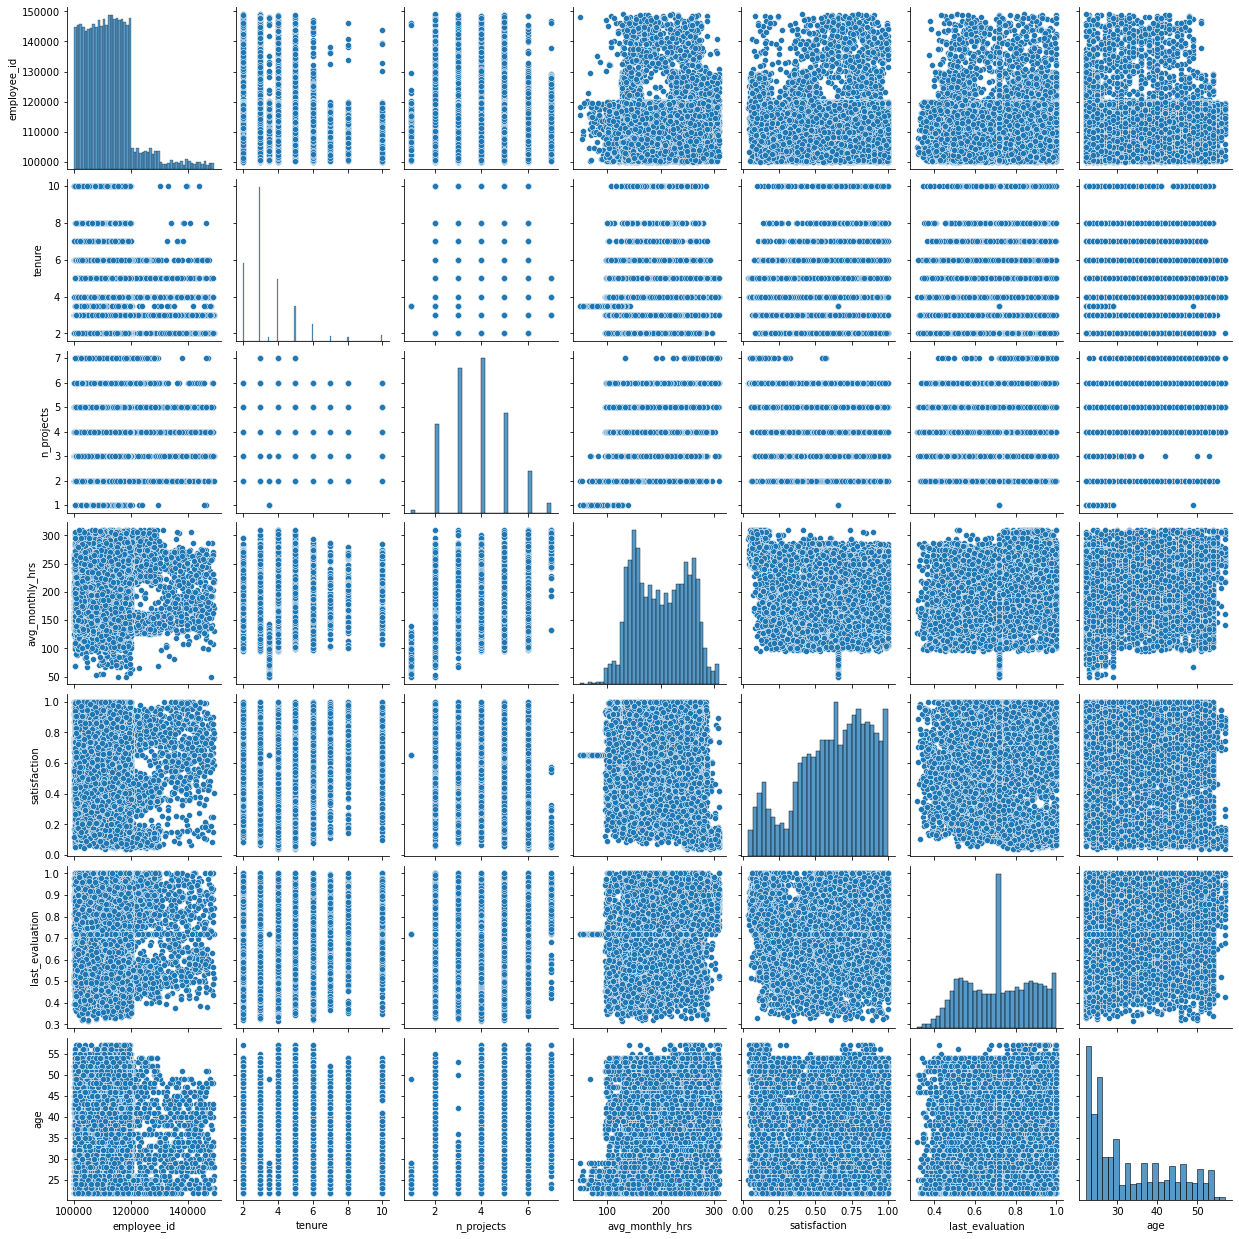

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age
employee_id,1.000000,0.005849,0.007068,0.010434,-0.079550,0.017078,-0.036361
tenure,0.005849,1.000000,0.185045,0.117964,-0.091514,0.126312,0.082337
n_projects,0.007068,0.185045,1.000000,0.436407,-0.144924,0.324537,0.623046
avg_monthly_hrs,0.010434,0.117964,0.436407,1.000000,-0.025192,0.320374,0.202274
satisfaction,-0.079550,-0.091514,-0.144924,-0.025192,1.000000,0.082787,-0.045414
last_evaluation,0.017078,0.126312,0.324537,0.320374,0.082787,1.000000,0.148351
age,-0.036361,0.082337,0.623046,0.202274,-0.045414,0.148351,1.000000


<AxesSubplot:>

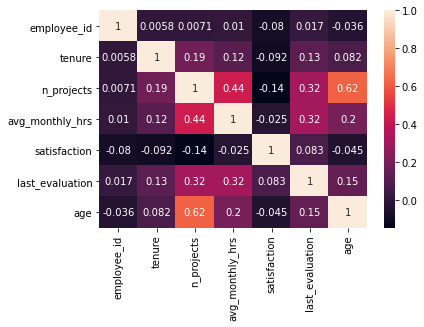

In [ ]:
sns.heatmap(df.corr(),annot=True)

---
<a name = Section9></a>
# **Post Data Processing & Feature Selection**
---

In [ ]:
df.drop("dept_head",axis=1, inplace=True)

<a name = Section9.1></a>
## Encoding the Categorical Data

In [ ]:
n_df = pd.get_dummies(df,drop_first=True)

In [ ]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   employee_id               13232 non-null  int64  
 1   tenure                    13232 non-null  float64
 2   n_projects                13232 non-null  int64  
 3   avg_monthly_hrs           13232 non-null  float64
 4   satisfaction              13232 non-null  float64
 5   last_evaluation           13232 non-null  float64
 6   age                       13232 non-null  int64  
 7   salary_low                13232 non-null  uint8  
 8   salary_medium             13232 non-null  uint8  
 9   status_Left               13232 non-null  uint8  
 10  gender_Male               13232 non-null  uint8  
 11  marital_status_Unmarried  13232 non-null  uint8  
 12  dept_name_Engineering     13232 non-null  uint8  
 13  dept_name_Finance         13232 non-null  uint8  
 14  dept_n

<a name = Section9.3></a>
##  Data Preparation<br>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = n_df.drop("status_Left",axis=1)
y = n_df.status_Left

In [ ]:
X

,employee_id,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,salary_low,salary_medium,gender_Male,...,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_name_Temp
0,115538,5.0,6,175.0,0.180900,0.518677,56,0,1,1,...,0,0,1,0,0,0,0,0,0,0
1,104082,5.0,3,112.0,0.629509,0.640356,23,0,1,1,...,0,0,1,0,0,0,0,0,0,0
2,109816,3.0,5,185.0,0.644417,0.718513,51,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,101734,3.0,4,184.0,0.859918,0.993731,26,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,110531,3.0,4,263.0,0.969817,0.546997,31,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,114267,3.0,5,165.0,0.634587,0.419153,38,0,1,0,...,0,0,0,0,0,1,0,0,0,0
13228,107919,2.0,3,195.0,0.578897,0.719636,24,0,1,1,...,0,0,0,0,0,1,0,0,0,0
13229,115170,2.0,5,271.0,0.884927,0.936487,48,0,1,1,...,0,0,0,0,0,1,0,0,0,0
13230,109959,4.0,5,197.0,0.292240,0.738941,34,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y.value_counts()*100/len(y)

0    76.420798
1    23.579202
Name: status_Left, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
train_emp = X_train.employee_id
X_train_new = X_train.drop("employee_id",axis=1)

In [ ]:
test_emp = X_test.employee_id
X_test_new = X_test.drop("employee_id",axis=1)

In [ ]:
test_emp

12148    107201
8355     100650
9040     139568
63       119673
9311     118227
          ...  
1870     106466
2804     108217
5980     109804
2211     119818
11218    105830
Name: employee_id, Length: 3970, dtype: int64

### Model Development & Evaluation

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state=0)

In [ ]:
model_logistic.fit(X_train_new, y_train)

C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
y_pred_logistic_train = model_logistic.predict(X_train_new)

In [ ]:
X_train_new

,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,salary_low,salary_medium,gender_Male,marital_status_Unmarried,dept_name_Engineering,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_name_Temp
11504,2.0,3,185.0,0.573865,1.000000,22,0,1,0,1,0,0,0,0,0,0,0,0,1,0
11043,3.0,3,190.0,1.000000,0.692292,27,0,1,1,1,0,0,0,0,0,0,0,0,1,0
3133,6.0,4,266.0,0.896180,1.000000,24,1,0,0,1,0,0,0,0,0,0,1,0,0,0
168,3.0,4,234.0,0.727367,0.822410,35,1,0,0,0,0,0,1,0,0,0,0,0,0,0
11256,2.0,4,177.0,0.763980,0.593782,25,1,0,1,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3.0,5,239.0,0.913425,0.916496,41,1,0,1,0,0,0,0,0,0,0,0,0,1,0
5191,6.0,5,232.0,0.765528,0.939877,33,0,1,1,0,1,0,0,0,0,0,0,0,0,0
5390,4.0,3,100.0,0.563564,1.000000,22,1,0,0,1,1,0,0,0,0,0,0,0,0,0
860,4.0,6,267.0,0.136566,0.997102,44,0,1,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_pred_logistic_train

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print(classification_report(y_train,y_pred_logistic_train))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      7082
           1       0.60      0.35      0.44      2180

    accuracy                           0.79      9262
   macro avg       0.71      0.64      0.66      9262
weighted avg       0.77      0.79      0.77      9262



### Sampling data set for imbalanced 



In [ ]:
#!pip uninstall scipy
#!pip install scipy
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=45)

In [ ]:
X_train_up,y_train_up = smote.fit_resample(X_train_new,y_train)

In [ ]:
v1 = model_logistic.fit(X_train_up,y_train_up)

C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
pd.concat([X_train_new,y_train],axis=1)

,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,salary_low,salary_medium,gender_Male,marital_status_Unmarried,...,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_name_Temp,status_Left
11504,2.0,3,185.0,0.573865,1.000000,22,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
11043,3.0,3,190.0,1.000000,0.692292,27,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
3133,6.0,4,266.0,0.896180,1.000000,24,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
168,3.0,4,234.0,0.727367,0.822410,35,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
11256,2.0,4,177.0,0.763980,0.593782,25,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3.0,5,239.0,0.913425,0.916496,41,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5191,6.0,5,232.0,0.765528,0.939877,33,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
5390,4.0,3,100.0,0.563564,1.000000,22,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
860,4.0,6,267.0,0.136566,0.997102,44,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
pd.concat([X_train_up,y_train_up],axis=1)

,tenure,n_projects,avg_monthly_hrs,satisfaction,last_evaluation,age,salary_low,salary_medium,gender_Male,marital_status_Unmarried,...,dept_name_Finance,dept_name_IT,dept_name_Management,dept_name_Marketing,dept_name_Procurement,dept_name_Product,dept_name_Sales,dept_name_Support,dept_name_Temp,status_Left
0,2.000000,3,185.000000,0.573865,1.000000,22,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,3.000000,3,190.000000,1.000000,0.692292,27,0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
2,6.000000,4,266.000000,0.896180,1.000000,24,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,3.000000,4,234.000000,0.727367,0.822410,35,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2.000000,4,177.000000,0.763980,0.593782,25,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14159,5.659930,5,262.000000,0.870347,0.947808,42,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
14160,3.000000,2,158.000000,0.411223,0.718513,24,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
14161,5.000000,4,246.000000,0.836749,0.951472,22,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
14162,5.320649,4,218.019027,0.706039,0.727622,46,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
v1_ypredtr = v1.predict(X_train_up)

In [ ]:
v1_ypredtr

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [ ]:
print(classification_report(y_train_up,v1_ypredtr))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      7082
           1       0.79      0.82      0.80      7082

    accuracy                           0.80     14164
   macro avg       0.80      0.80      0.80     14164
weighted avg       0.80      0.80      0.80     14164



In [ ]:
v1_ypredte = v1.predict(X_test_new)

In [ ]:
v1_ypredte

array([0, 1, 0, ..., 1, 0, 0], dtype=uint8)

In [ ]:
v1_prob = model_logistic.predict_proba(X_test_new)

In [ ]:
v1_prob

array([[0.65330404, 0.34669596],
       [0.24496839, 0.75503161],
       [0.76359308, 0.23640692],
       ...,
       [0.28308026, 0.71691974],
       [0.55576922, 0.44423078],
       [0.92587596, 0.07412404]])

In [ ]:
print(classification_report(y_test,v1_ypredte))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      3030
           1       0.47      0.66      0.55       940

    accuracy                           0.74      3970
   macro avg       0.67      0.71      0.68      3970
weighted avg       0.78      0.74      0.76      3970



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier()

In [ ]:
v2 = model_rf.fit(X_train_up,y_train_up)

In [ ]:
v2_ypredtr = model_rf.predict(X_train_up)


In [ ]:
print(classification_report(y_train_up,v2_ypredtr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7082
           1       1.00      1.00      1.00      7082

    accuracy                           1.00     14164
   macro avg       1.00      1.00      1.00     14164
weighted avg       1.00      1.00      1.00     14164



In [ ]:
v2_ypredte = model_rf.predict(X_test_new)

In [ ]:
v2_prob = model_rf.predict_proba(X_test_new)

In [ ]:
v2_prob

array([[0.94, 0.06],
       [0.26, 0.74],
       [0.99, 0.01],
       ...,
       [0.95, 0.05],
       [0.01, 0.99],
       [1.  , 0.  ]])

In [ ]:
print(classification_report(y_test,v2_ypredte))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3030
           1       0.95      0.91      0.93       940

    accuracy                           0.97      3970
   macro avg       0.96      0.95      0.95      3970
weighted avg       0.97      0.97      0.97      3970



In [ ]:
y_test_final=y_test
y_test_final['Predict Stauts']=v2_ypredte

In [ ]:
y_test_final.describe()

count     3971
unique       3
top          0
freq      3030
Name: status_Left, dtype: int64

In [ ]:
te = pd.Series(test_emp).reset_index(drop=True)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,accuracy_score
def val(algo,xtrain=X_train,xtest=X_test,ytrain=y_train,ytest=y_test):
    
    algo.fit(xtrain,ytrain)
    ytrp = algo.predict(xtrain)
    ytrpa = algo.predict_proba(xtrain)[:,1]
    
    
    ytep = algo.predict(xtest)
    ytepa = algo.predict_proba(xtest)[:,1]
    
    print('Training')
    print('confusion_matrix:\n',confusion_matrix(ytrain,ytrp))
    print('accuracy_score: ', accuracy_score(ytrain,ytrp))
    print('roc-auc: ',roc_auc_score(ytrain,ytrp))
    print('classification_report\n',classification_report(ytrain,ytrp))
    
    fpr,tpr, thresholds = roc_curve(ytrain,ytrpa)
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.title('roc_curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
    print(ytest.shape,ytep.shape)
    print('-'*100)
    print('Testing')
    print('confusion_matrix:\n',confusion_matrix(ytest,ytep))
    print('accuracy_score: ', accuracy_score(ytest,ytep))
    print('roc-auc: ',roc_auc_score(ytest,ytep))
    print('classification_report\n',classification_report(ytest,ytep))
    
    fpr,tpr, thresholds = roc_curve(ytest,ytepa)
    plt.plot(fpr,tpr,'r')
    plt.plot(fpr,fpr)
    plt.title('roc_curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()

In [ ]:
modellr = LogisticRegression(solver='saga', max_iter=110 )

Training
confusion_matrix:
 [[5340 1742]
 [1682 5400]]
accuracy_score:  0.7582603784241739
roc-auc:  0.7582603784241738
classification_report
               precision    recall  f1-score   support

           0       0.76      0.75      0.76      7082
           1       0.76      0.76      0.76      7082

    accuracy                           0.76     14164
   macro avg       0.76      0.76      0.76     14164
weighted avg       0.76      0.76      0.76     14164



C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


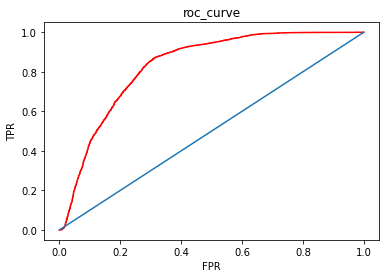

(3970,) (3970,)
----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[2251  779]
 [ 378  562]]
accuracy_score:  0.7085642317380353
roc-auc:  0.6703883154272874
classification_report
               precision    recall  f1-score   support

           0       0.86      0.74      0.80      3030
           1       0.42      0.60      0.49       940

    accuracy                           0.71      3970
   macro avg       0.64      0.67      0.64      3970
weighted avg       0.75      0.71      0.72      3970



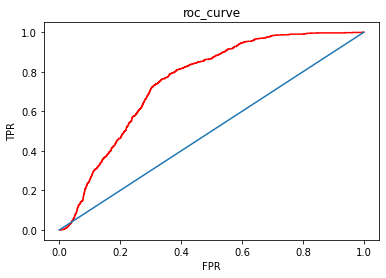

In [ ]:
val(algo = modellr , xtrain=X_train_up, ytrain=y_train_up, xtest=X_test_new, ytest=y_test)

### Evaluate models and finalize the model

Training
confusion_matrix:
 [[7082    0]
 [   0 7082]]
accuracy_score:  1.0
roc-auc:  1.0
classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7082
           1       1.00      1.00      1.00      7082

    accuracy                           1.00     14164
   macro avg       1.00      1.00      1.00     14164
weighted avg       1.00      1.00      1.00     14164



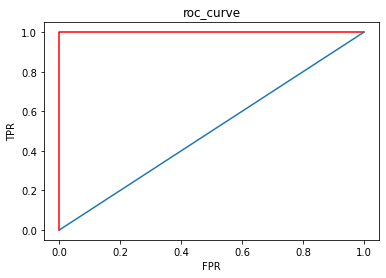

(3970,) (3970,)
----------------------------------------------------------------------------------------------------
Testing
confusion_matrix:
 [[2983   47]
 [  80  860]]
accuracy_score:  0.9680100755667507
roc-auc:  0.9496910329330804
classification_report
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      3030
           1       0.95      0.91      0.93       940

    accuracy                           0.97      3970
   macro avg       0.96      0.95      0.96      3970
weighted avg       0.97      0.97      0.97      3970



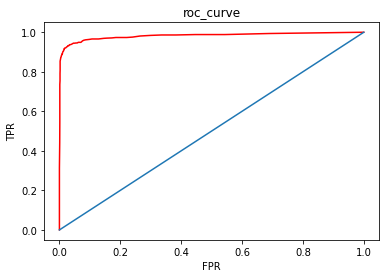

In [ ]:
val(algo = model_rf, xtrain=X_train_up, ytrain=y_train_up, xtest=X_test_new, ytest=y_test)


In [ ]:
mx = X.drop("employee_id",axis = 1)

### cross-validation

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_rf, mx, y, cv=cv,scoring="roc_auc")
scores

array([0.98218088, 0.97533533, 0.98155466, 0.98160657, 0.97182634])

In [ ]:
np.mean([0.98218088, 0.97533533, 0.98155466, 0.98160657, 0.97182634])

0.9785007560000001

In [ ]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=6)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modellr, mx, y, cv=cv)
scores

C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\jaswa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

array([0.75793291, 0.75838622, 0.75600907, 0.7138322 , 0.73333333,
       0.76190476])

### So decide to go with Random  Forest 

### Exporting the results 

In [ ]:
krk = pd.Series(v2_prob[:, 1])
tt = pd.concat([te,krk],axis=1)

In [ ]:
tt.to_csv("1010_GCD_Capstone_Project_Result.csv",header = False, index = False)

In [ ]:
tt

,employee_id,0
0,107201,0.07
1,100650,0.69
2,139568,0.01
3,119673,0.03
4,118227,0.10
...,...,...
3965,115948,0.94
3966,113120,0.02
3967,109804,0.03
3968,114459,0.99


In [ ]:
final = tt.dropna()

In [ ]:
final

,employee_id,0
0,107201,0.07
1,100650,0.69
2,139568,0.01
3,119673,0.03
4,118227,0.10
...,...,...
3965,115948,0.94
3966,113120,0.02
3967,109804,0.03
3968,114459,0.99


### submission csv

In [ ]:
y_test_final.to_csv('Y_test_data.csv')